In [16]:
# Data Preprocessing
data=pd.read_csv('Data.csv')

In [17]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [18]:
x=data.iloc[:,:-1].values

In [19]:
y=data.iloc[:,3].values

In [20]:
from sklearn.preprocessing import Imputer

In [21]:
imp=Imputer(missing_values='NaN', strategy='mean',axis=0)

In [23]:
imp=imp.fit(x[:,1:3])

In [24]:
x[:,1:3]=imp.transform(x[:,1:3])

In [25]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [30]:
# Categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [27]:
lbl=LabelEncoder()

In [29]:
x[:,0]=lbl.fit_transform(x[:,0])
x
#this is wrong as there is no mathematical relation among various countries

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [35]:
ohe=OneHotEncoder(categorical_features=[0])
x=ohe.fit_transform(x).toarray()
# Similarly do it for y

In [40]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [2]:
# Linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
sb.set()

In [104]:
df=pd.read_csv('Salary_Data.csv')

In [105]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [106]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [108]:
# Applying Regression
from sklearn.linear_model import LinearRegression

In [109]:
obj=LinearRegression()

In [110]:
obj.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
ypr=obj.predict(x_test)

Text(0, 0.5, 'Salary')

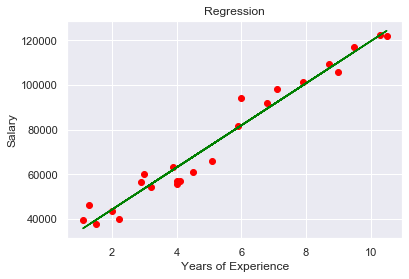

In [112]:

# Visualising the results
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, obj.predict(x_train), color="green")
plt.title("Regression")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypr)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [73]:
# Multiple Linear Regression

In [115]:
dt=pd.read_csv("50_Startups.csv")
dt.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [116]:
x=dt.iloc[:,:-1].values
y=dt.iloc[:,4].values

In [117]:

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [118]:
lbl=LabelEncoder()
x[:,3]=lbl.fit_transform(x[:,3])
ohe=OneHotEncoder(categorical_features=[3])
x=ohe.fit_transform(x).toarray()

e:\pypro\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [119]:
x=x[:,1:]

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
obj=LinearRegression()

In [123]:
obj.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
ypr=obj.predict(x_test)

In [131]:
ypr=pd.DataFrame(data=ypr)

In [130]:
y_test=pd.DataFrame(data=y_test)

In [134]:
from sklearn.metrics import r2_score
r2_score(y_test,ypr)

0.9783259006626771

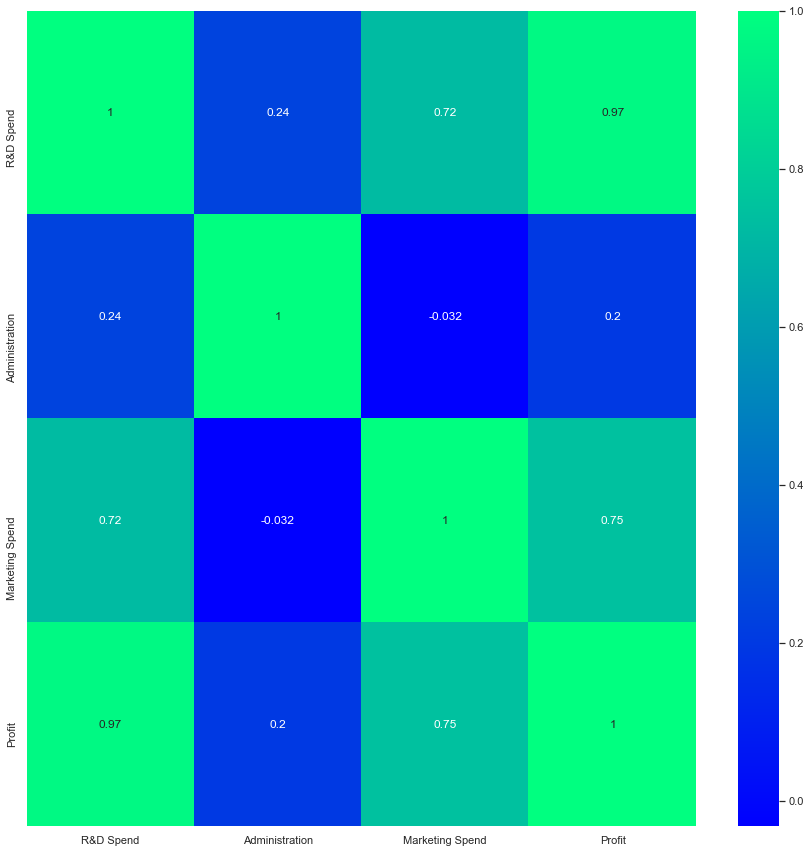

In [136]:
plt.figure(figsize=(15,15))
sb.heatmap(dt.corr(),annot=True,cmap='winter')
plt.show()

In [137]:
# Backward chain Elimination is also a way to drop columns with less importance, to improve overall efficiency

In [138]:
# Polynomial Regression

In [139]:
dt=pd.read_csv("Position_Salaries.csv")
dt.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [140]:
dt

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [168]:
x=dt.iloc[:,1:2].values
y=dt.iloc[:,2].values

In [169]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

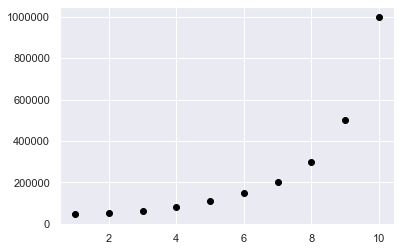

In [145]:
plt.scatter(x,y,color="black")

In [170]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)
li2=LinearRegression()
li2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

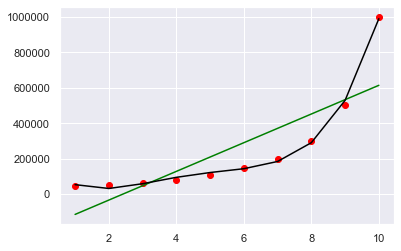

In [159]:
plt.scatter(x, y, color="red")
plt.plot(x, lin.predict(x), color="green")
plt.plot(x , li2.predict(poly.fit_transform(x) ), color="black")

In [162]:
ypr=li2.predict(poly.fit_transform(x_test))

In [163]:
ypr

array([121724.94172495,  31759.90675984])

In [164]:
y_test

array([110000,  50000], dtype=int64)

In [ ]:
# Support Vector Regression

In [3]:
df=pd.read_csv('Position_Salaries.csv')

In [4]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [14]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2:3].values

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')

In [17]:
reg.fit(x , y)

e:\pypro\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\pypro\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

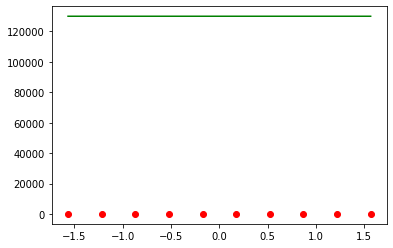

In [19]:
plt.scatter(x, y, color="red")
plt.plot(x, reg.predict(x), color="green")

In [18]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x = scx.fit_transform(x)
y = scy.fit_transform(y)

In [20]:
# Decision Tree Regression

In [2]:
df=pd.read_csv("Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

In [6]:
from sklearn.tree import DecisionTreeRegressor
rg= DecisionTreeRegressor()
rg.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

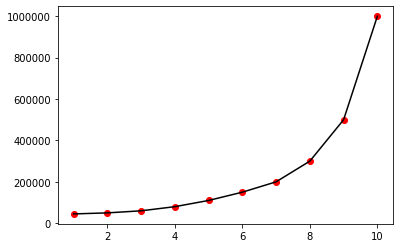

In [9]:
plt.scatter(x, y, color="red")
plt.plot(x, rg.predict(x), color="black")

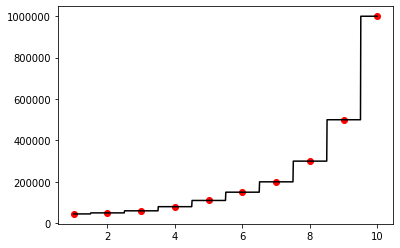

In [11]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid) , 1))
plt.scatter(x, y, color="red")
plt.plot(x_grid, rg.predict(x_grid), color="black")

In [ ]:
# Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=10, random_state=0)
reg.fit(x , y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

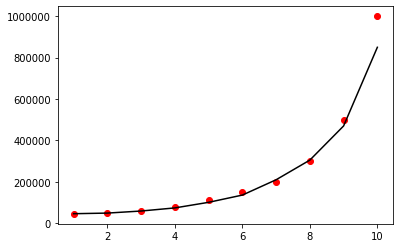

In [14]:
plt.scatter(x, y, color="red")
plt.plot(x, reg.predict(x), color="black")

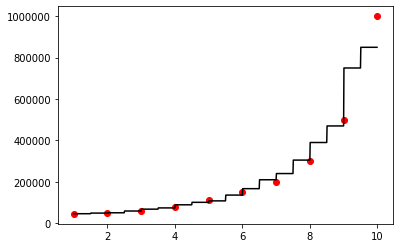

In [15]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid) , 1))
plt.scatter(x, y, color="red")
plt.plot(x_grid, reg.predict(x_grid), color="black")